In [94]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
# Defino las matrices de Pauli
sigma_0 = np.array([[1, 0], [0, 1]], dtype=complex)
sigma_1 = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_2 = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_3 = np.array([[1, 0], [0, -1]], dtype=complex)
sigma_vec = np.array([sigma_1, sigma_2, sigma_3], dtype=complex)

### Funciones útiles

In [96]:
def get_bands4(H, params, path, N = 100):
    k_vals = np.linspace(-np.pi, np.pi, N)

    E1 = np.array([])
    E2 = np.array([])
    E3 = np.array([])
    E4 = np.array([])    

    k = np.zeros((N, 3))

    if path == 'x':
        k[:, 0] = k_vals

        for i in range(len(k)):
            E1_, E2_, E3_, E4_ = np.linalg.eigh(H(*params, k[i]))[0]
            E1 = np.append(E1, [E1_])
            E2 = np.append(E2, [E2_])
            E3 = np.append(E3, [E3_])
            E4 = np.append(E4, [E4_])
        
        plt.plot(k_vals, E1)
        plt.plot(k_vals, E2)
        plt.plot(k_vals, E3)
        plt.plot(k_vals, E4)

        plt.xlabel('$k_y$, $k_x = 0$')
        plt.ylabel('Energía')
    
    if path == 'y':
        k[:, 1] = k_vals
        for i in range(len(k)):
            E1_, E2_, E3_, E4_ = np.linalg.eigh(H(*params, k[i]))[0]
            E1 = np.append(E1, [E1_])
            E2 = np.append(E2, [E2_])
            E3 = np.append(E3, [E3_])
            E4 = np.append(E4, [E4_])
        
        plt.plot(k_vals, E1)
        plt.plot(k_vals, E2)
        plt.plot(k_vals, E3)
        plt.plot(k_vals, E4)

        plt.xlabel('$k_x a$, $k_y = 0$')
        plt.ylabel('Energía')

    if path == 'diag':
        k[:, :2] = k_vals
        for i in range(len(k)):
            E1_, E2_, E3_, E4_ = np.linalg.eigh(H(*params, k[i]))[0]
            E1 = np.append(E1, [E1_])
            E2 = np.append(E2, [E2_])
            E3 = np.append(E3, [E3_])
            E4 = np.append(E4, [E4_])
        
        plt.plot(np.linalg.norm(k), E1)
        plt.plot(np.linalg.norm(k), E2)
        plt.plot(np.linalg.norm(k), E3)
        plt.plot(np.linalg.norm(k), E4)

        plt.xlabel('$k_x a$, $k_y a$')
        plt.ylabel('Energía')

def get_bands2(H, params, path, title=''):
    N = 100
    k_vals = np.linspace(-np.pi, np.pi, N)

    E1 = np.array([])
    E2 = np.array([])

    k = np.zeros((N, 3))

    if path == 'x':
        k[:, 0] = k_vals

        for i in range(len(k)):
            E1_, E2_= np.linalg.eigh(H(*params, k[i]))[0]
            E1 = np.append(E1, [E1_])
            E2 = np.append(E2, [E2_])

        plt.figure()
        plt.plot(k_vals, E1, color='black')
        plt.plot(k_vals, E2, color='black')

        plt.xlabel('$k_x$, $k_y = 0$')
        plt.ylabel('Energía')
        plt.title(title)
    
    if path == 'y':
        k[:, 1] = k_vals
        for i in range(len(k)):
            E1_, E2_ = np.linalg.eigh(H(*params, k[i]))[0]
            E1 = np.append(E1, [E1_])
            E2 = np.append(E2, [E2_])
        
        plt.figure()
        plt.plot(k_vals, E1, color='black')
        plt.plot(k_vals, E2, color='black')

        plt.xlabel('$k_x a$, $k_y = 0$')
        plt.ylabel('Energía')

    if path == 'diag':
        k[:, :2] = np.vstack([k_vals, k_vals]).T
        print(k)
        for i in range(len(k)):
            E1_, E2_ = np.linalg.eigh(H(*params, k[i]))[0]
            E1 = np.append(E1, [E1_])
            E2 = np.append(E2, [E2_])
        
        k_path = [np.linalg.norm(K) for K in k]

        plt.figure()
        plt.plot(k_path, E1)
        plt.plot(k_path, E2)

        plt.xlabel('$k_x a$, $k_y a$')
        plt.ylabel('Energía')

def get_sigmaexpectationvalue(H, params, k_values): #k_values tiene arrays [kx, ky] (1-dimensional)
    N = len(k_values)

    psi_mesh1 = np.zeros((N, 2), dtype=complex)
    psi_mesh2 = np.zeros((N, 2), dtype=complex)

    for i in range(N):
        psi_mesh1[i] += np.linalg.eigh(H(*params, np.hstack((k_values[i], [0]))))[1][0]
        psi_mesh2[i] += np.linalg.eigh(H(*params, np.hstack((k_values[i], [0]))))[1][1]

    ev_sigma_1_1 = np.zeros(N)
    ev_sigma_1_2 = np.zeros(N)
    ev_sigma_2_1 = np.zeros(N)
    ev_sigma_2_2 = np.zeros(N)
    ev_sigma_3_1 = np.zeros(N)
    ev_sigma_3_2 = np.zeros(N)

    for i in range(N):
        for j in range(N):
            ev_sigma_1_1 += np.real(np.dot(np.conjugate(psi_mesh1[i].T), np.dot(sigma_1, psi_mesh1[i])))
            ev_sigma_1_2 += np.real(np.dot(np.conjugate(psi_mesh2[i].T), np.dot(sigma_1, psi_mesh2[i])))
            ev_sigma_2_1 += np.real(np.dot(np.conjugate(psi_mesh1[j].T), np.dot(sigma_2, psi_mesh1[i])))
            ev_sigma_2_2 += np.real(np.dot(np.conjugate(psi_mesh2[i].T), np.dot(sigma_2, psi_mesh2[i])))
            ev_sigma_3_1 += np.real(np.dot(np.conjugate(psi_mesh1[i].T), np.dot(sigma_3, psi_mesh1[i])))
            ev_sigma_3_2 += np.real(np.dot(np.conjugate(psi_mesh2[i].T), np.dot(sigma_3, psi_mesh2[i])))
    
    return np.array([ev_sigma_1_1, ev_sigma_1_2, ev_sigma_2_1, ev_sigma_2_2, ev_sigma_3_1, ev_sigma_3_2])


def get_energy(H, N, params, i = 0):
    k_val = np.linspace(-np.pi, np.pi, N)
    k_mesh = np.zeros((N, N), dtype=object)
    for i in range(N):
        for j in range(N):
            k_mesh[i,j] = np.array([k_val[i], k_val[j], 0])
    
    E_mesh1 = np.zeros((N, N), dtype=object)
    E_mesh2 = np.zeros((N, N), dtype=object)
    
    # Obtengo las energías
    for i in range(N):
        for j in range(N):
            E_mesh1[i,j], E_mesh2[i,j] = np.linalg.eigh(H(*params, k_mesh[i,j]))[0]
    
    if i == 1:
        return E_mesh1
    
    if i == 2:
        return E_mesh2

    return E_mesh1, E_mesh2


# Halla el contorno de un hamiltoniano H para una dada energía
def get_contour(H, params, E, N=100):
    k_val = np.linspace(-np.pi, np.pi, N)
    x, y = np.meshgrid(k_val, k_val)
    E_mesh1, E_mesh2 = get_energy(H, N, params)

    contour1 = plt.contour(x, y, E_mesh1, levels=[E])
    contour2 = plt.contour(x, y, E_mesh2, levels=[E])

    for i, collection in enumerate(contour1.collections):
        for path in collection.get_paths():
            v1 = path.vertices  # Matriz de coordenadas [x, y]
    
    for i, collection in enumerate(contour2.collections):
        for path in collection.get_paths():
            v2 = path.vertices  # Matriz de coordenadas [x, y]

    return v1, v2


def get_Fermi_weighted(H, params, E, N=100):
    v1_, v2_ = get_contour(H, params, E, N) # vi tiene las cordenadas kx en vi[:, 0] y ky en [:, 1]
    v1 = np.array(v1_)
    v2 = np.array(v2_)

    ev1 = get_sigmaexpectationvalue(H, params, v1)
    ev2 = get_sigmaexpectationvalue(H, params, v2)

    plt.figure()
    p1 = plt.scatter(v1[:, 0], v1[:, 1], c=ev1[0], cmap='viridis')
    #p2 = plt.scatter(v2[:, 0], v2[:, 1], c=ev2[1], cmap='viridis')
    plt.colorbar(p1, label='$s_x$')
    #plt.colorbar(p2, label='$s_x$')

    plt.figure()
    p1 = plt.scatter(v1[:, 0], v1[:, 1], c=ev1[2], cmap='viridis')
    p2 = plt.scatter(v2[:, 0], v2[:, 1], c=ev2[3], cmap='viridis')
    plt.colorbar(p1, label='$s_y$')
    plt.colorbar(p2, label='$s_y$')

    plt.figure()
    p1 = plt.scatter(v1[:, 0], v1[:, 1], c=ev1[4], cmap='viridis')
    p2 = plt.scatter(v2[:, 0], v2[:, 1], c=ev2[5], cmap='viridis')
    plt.colorbar(p1, label='$s_z$')
    plt.colorbar(p2, label='$s_z$')



    

    



def create_data(H, N, params, title):
    k_val = np.linspace(-np.pi, np.pi, N)
    k_mesh = np.zeros((N, N), dtype=object)
    for i in range(N):
        for j in range(N):
            k_mesh[i,j] = np.array([k_val[i], k_val[j], 0])
    
    E_mesh1 = np.zeros((N, N), dtype=object)
    E_mesh2 = np.zeros((N, N), dtype=object)
    
    # Obtengo las energías
    for i in range(N):
        for j in range(N):
            E_mesh1[i,j], E_mesh2[i,j] = np.linalg.eigh(H(*params, k_mesh[i,j]))[0]
    
    # Obtengo los valores de expectación del espín
    exp_spin = get_sigmaexpectationvalue(H, params, k_mesh)

    # Guardo los datos en un archivo
    

def get_Fermi(H, params, title='', N=100):
    k_val = np.linspace(-np.pi, np.pi, N)
    k_mesh = np.zeros((N, N), dtype=object)
    for i in range(N):
        for j in range(N):
            k_mesh[i,j] = np.array([k_val[i], k_val[j], 0])
    
    E_mesh1 = np.zeros((N, N), dtype=object)
    E_mesh2 = np.zeros((N, N), dtype=object)
    
    # Obtengo las energías
    for i in range(N):
        for j in range(N):
            E_mesh1[i,j], E_mesh2[i,j] = np.linalg.eigh(H(*params, k_mesh[i,j]))[0]

    # Lo grafico
    print(f'Graficando {title}...')
    k_x, k_y = np.meshgrid(k_val, k_val)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(k_x, k_y, E_mesh1)
    ax.plot_surface(k_x, k_y, E_mesh2)
    ax.plot_surface(k_x, k_y, np.ones((N,N)), color='black', alpha=0.5)

    ax.set_xlabel('$k_x$')
    ax.set_ylabel('$k_y$')
    ax.set_zlabel('Energía')
    ax.set_title(title)

    # Grafico la superficie de Fermi
    plt.figure()
    plt.contour(k_x, k_y, E_mesh1, levels=[1], colors='tab:blue')
    plt.contour(k_x, k_y, E_mesh2, levels=[1], colors='tab:orange')
    plt.xlabel('$k_x$')
    plt.ylabel('$k_y$')
    plt.title(f'Superficie de Fermi E=1 para {title}')
    
    #plt.colorbar(contour1)
    #plt.colorbar(contour2)
    plt.grid()

### Primer modelo

$$ H = 2t \left( \cos \frac{k_x}{2} \, \tau_1 + \cos k_y \right) + 2t_J \left( \sin \frac{k_x}{2} \, \sigma_1 \otimes \tau_2 + \cos k_y \, \sigma_2 \otimes \tau_3 \right) $$

In [97]:
# Defino el Hamiltoniano
def Hamiltonian1(t, tJ, k):
    return 2*t * (np.cos(k[0]/2) * np.kron(sigma_1, sigma_0) + np.cos(k[1]) * np.kron(sigma_0, sigma_0)) + 2*tJ * (np.sin(k[0]/2) * np.kron(sigma_1, sigma_2) + np.cos(k[1]) * np.kron(sigma_2, sigma_3))

### Segundo modelo

$$ H = \frac{k^2}{2m} + \gamma (k_x^2 - k_y^2) \sigma_z + \alpha \hat{z} \cdot (\vec{\sigma} \times \mathbf{k}) + \mathbf{h} \cdot \vec{\sigma} $$

In [98]:
def Hamiltonian2(m, gamma, alpha, h, k):
   # k y h vectores de 3 componentes
   z = np.array([0, 0, 1])

   # Hago el producto vectorial sigma x k
   cross = np.array([k[1] * sigma_3 - k[2] * sigma_2, k[2] * sigma_1 - k[0] * sigma_3, k[0] * sigma_2 - k[1] * sigma_1])

   # Hago el producto escalar entre h y sigma
   dot = h[0] * sigma_1 + h[1] * sigma_2 + h[2] * sigma_3

   return np.linalg.norm(k)**2/(2*m) * sigma_0 + gamma * (k[0]**2 - k[1]**2) * sigma_3 + alpha * cross[2] + dot

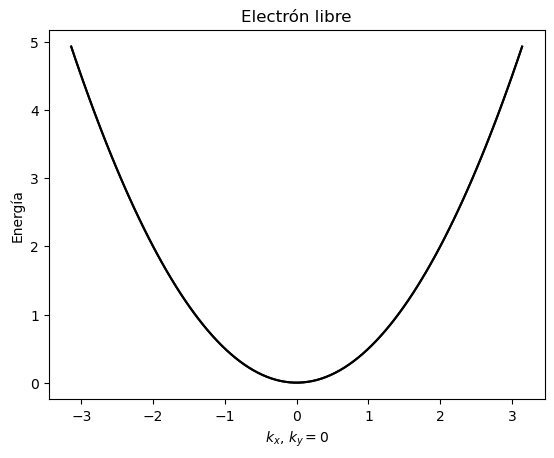

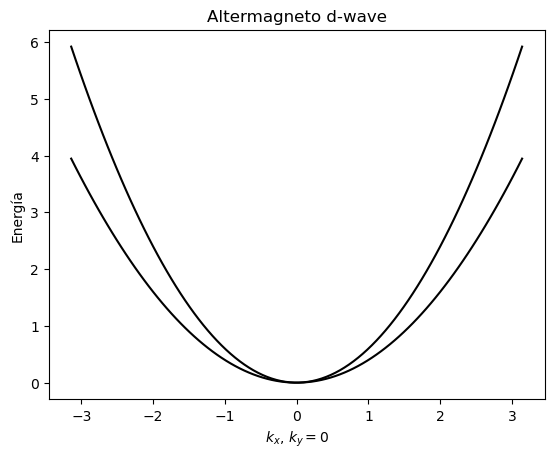

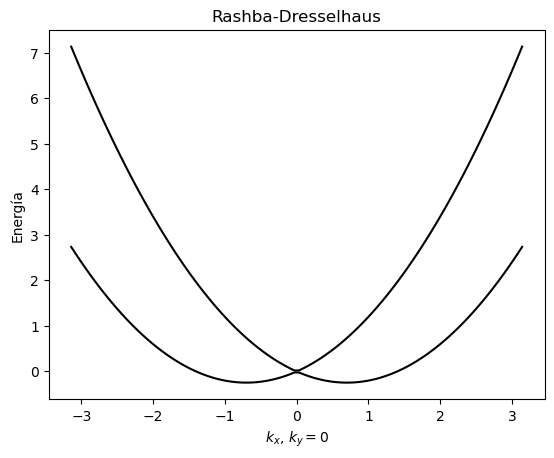

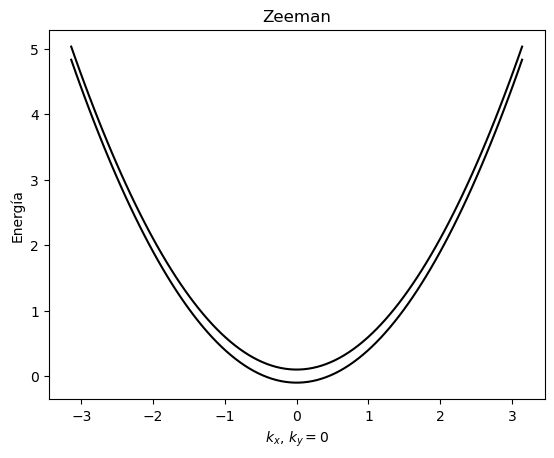

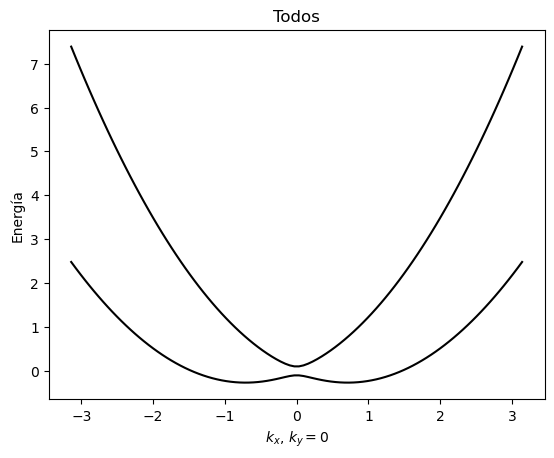

In [99]:
get_bands2(Hamiltonian2, [1, 0, 0, np.array([0, 0, 0])], 'x', title='Electrón libre')
get_bands2(Hamiltonian2, [1, 0.1, 0, np.array([0, 0, 0])], 'x', title='Altermagneto d-wave')
get_bands2(Hamiltonian2, [1, 0, 0.7, np.array([0, 0, 0])], 'x', title='Rashba-Dresselhaus')
get_bands2(Hamiltonian2, [1, 0, 0, np.array([0, 0, 0.1])], 'x', title='Zeeman')
get_bands2(Hamiltonian2, [1, 0.1, 0.7, np.array([0, 0, 0.1])], 'x', title='Todos')

Graficando Electrón libre...
Graficando Degeneración de espín...
Graficando Altermagneto d-wave...
Graficando Zeeman...


/var/folders/pj/gfpdkgw14qz6t_gds0y489vh0000gn/T/ipykernel_29169/4220114557.py:280: UserWarning: No contour levels were found within the data range.
  plt.contour(k_x, k_y, E_mesh2, levels=[1], colors='tab:orange')


Graficando Todos...


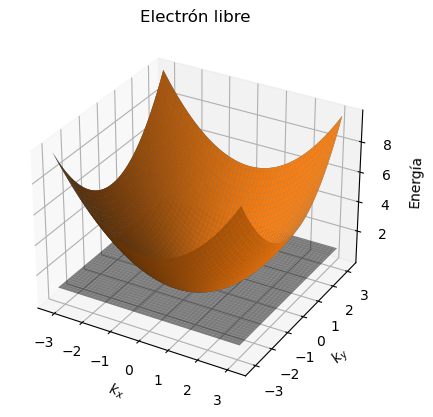

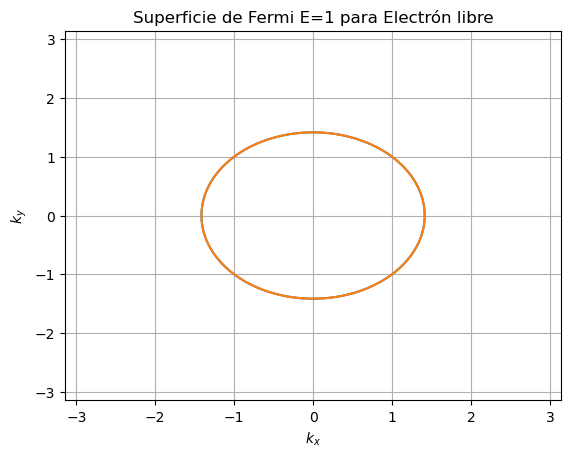

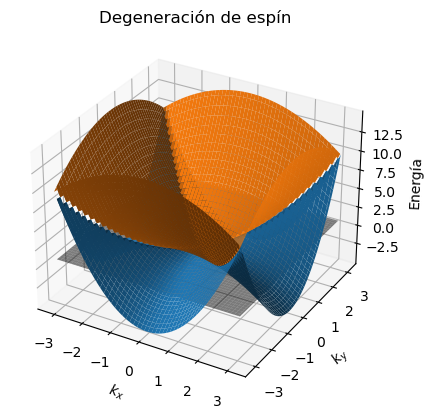

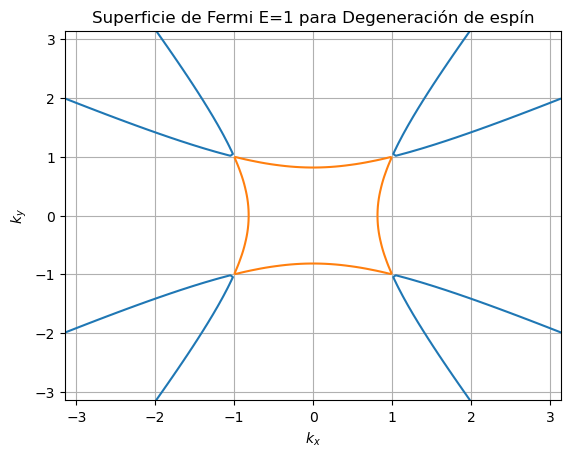

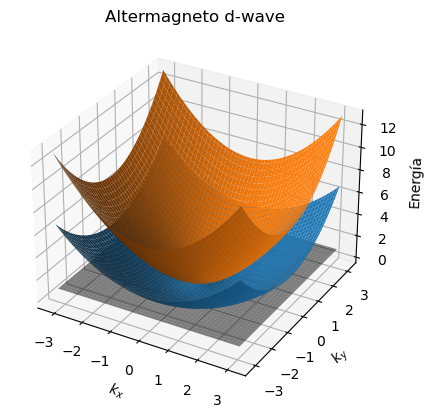

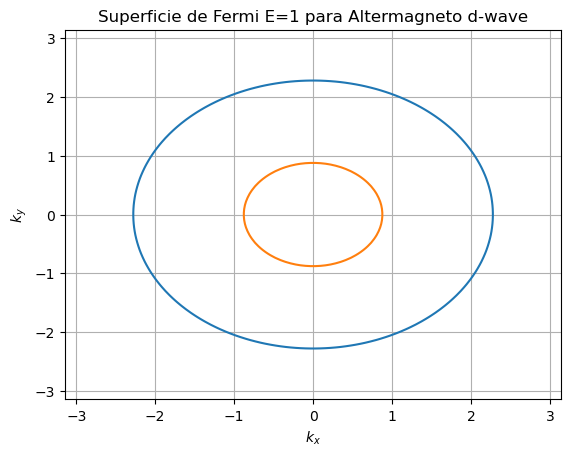

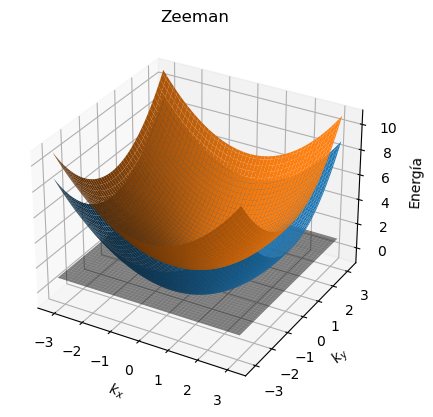

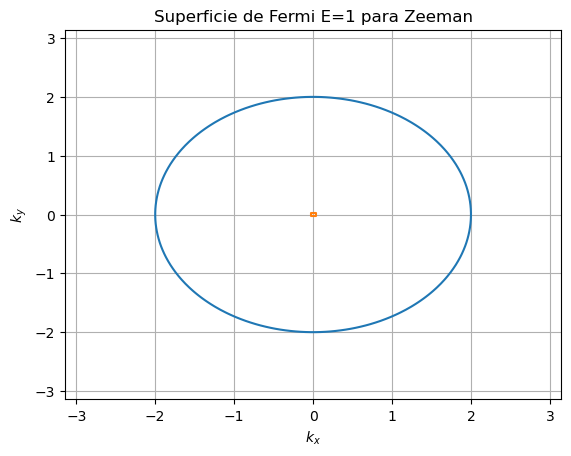

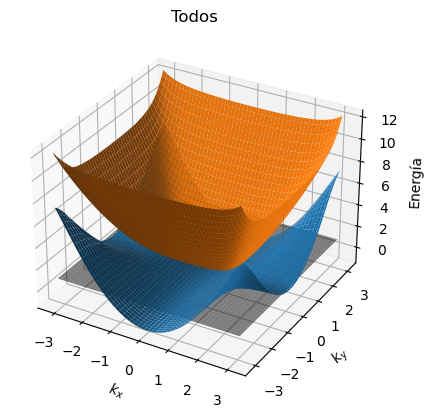

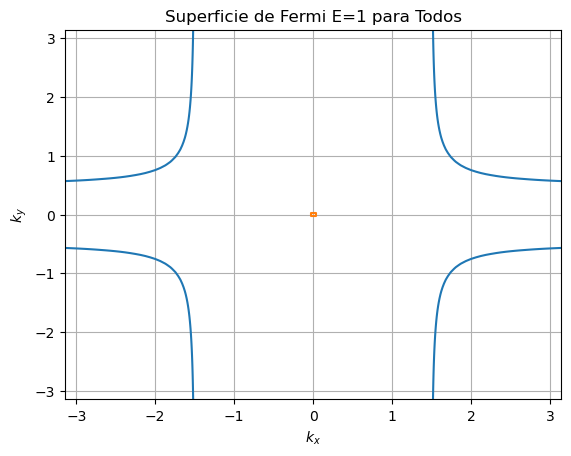

In [100]:
get_Fermi(Hamiltonian2, [1, 0, 0, np.array([0, 0, 0])], 'Electrón libre')
get_Fermi(Hamiltonian2, [1, 1, 0, np.array([0, 0, 0])], 'Degeneración de espín')
get_Fermi(Hamiltonian2, [1, 0, 0.7, np.array([0, 0, 0])], 'Altermagneto d-wave')
get_Fermi(Hamiltonian2, [1, 0, 0, np.array([0, 0, 1])], 'Zeeman')
get_Fermi(Hamiltonian2, [1, 0.5, 0.5, np.array([0, 0, 1])], 'Todos')

Ejemplos

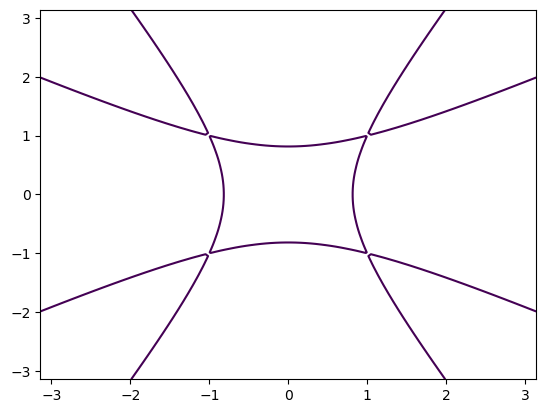

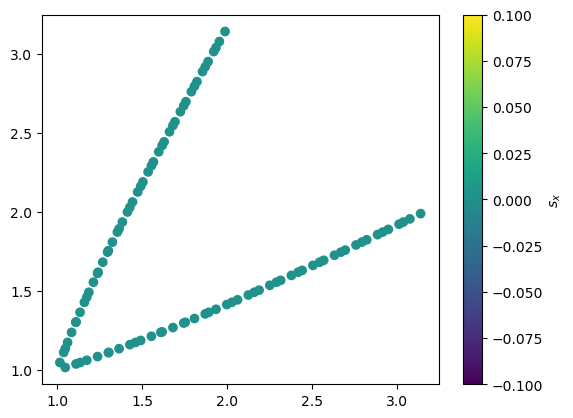

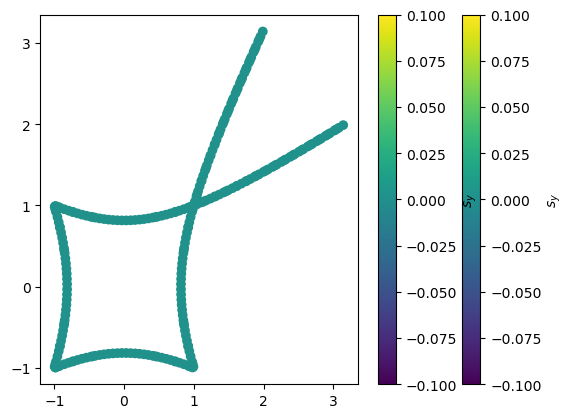

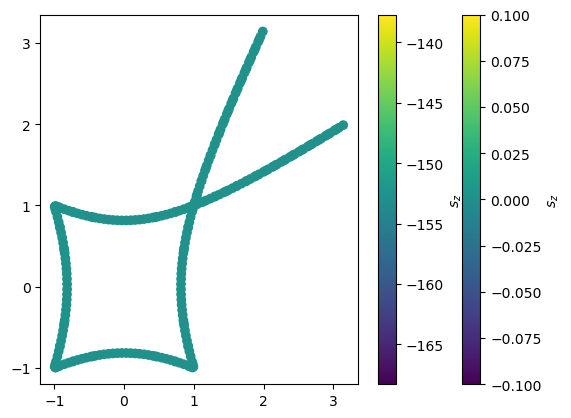

In [101]:
get_Fermi_weighted(Hamiltonian2, [1, 1, 0, np.array([0, 0, 0])], 1)